## Apple Mobility data processing

In [1]:
import pandas as pd

In [2]:
apple = pd.read_csv('data_sources/applemobilitytrends-2021-06-09.csv')
apple

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,149.58,157.67,153.29,162.09,190.67,214.99,213.95,161.85,166.46,162.17
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,188.06,177.06,185.50,197.14,204.56,202.86,172.67,188.83,188.27,177.95
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,54.32,57.49,61.92,65.09,76.41,57.66,37.39,58.99,61.43,62.94
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,47.59,51.83,54.26,55.95,64.33,47.02,32.39,51.28,53.86,54.55
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,91.93,94.84,96.80,104.09,106.21,86.95,91.25,92.64,96.71,100.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,170.72,206.08,211.49,216.57,277.29,256.08,189.17,214.64,212.10,209.78
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,167.07,157.52,170.12,193.09,234.49,330.76,178.39,174.05,159.15,172.63
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,162.30,160.78,157.21,162.22,203.96,191.52,159.80,172.57,161.72,155.91
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,148.72,134.29,126.04,129.39,154.77,133.13,119.60,125.61,125.22,125.18


In [16]:
london = apple[apple.region=='London'].drop(['geo_type', 'region', 'alternative_name',
                                             'sub-region', 'country'], axis=1)
london.set_index('transportation_type', inplace=True)
london = london.transpose()
london

transportation_type,driving,transit,walking
2020-01-13,100.00,100.00,100.00
2020-01-14,107.65,105.14,108.89
2020-01-15,111.20,107.06,116.84
2020-01-16,108.29,106.08,118.82
2020-01-17,115.08,115.13,132.18
...,...,...,...
2021-06-05,132.43,138.70,155.60
2021-06-06,110.19,111.32,97.28
2021-06-07,110.65,108.69,96.80
2021-06-08,114.84,111.81,104.24


In [12]:
london.to_csv('datasets/apple.csv')

In [17]:
# First Lockdown
london.loc['2020-03-23':'2020-05-13'].mean()

transportation_type
driving    34.4932
transit    14.8884
walking    26.4052
dtype: float64

In [19]:
# Second lockdown
london.loc['2020-11-05':'2020-12-02'].mean()

transportation_type
driving    71.091071
transit    46.813571
walking    50.173929
dtype: float64

In [20]:
# Third lockdown
london.loc['2020-12-20':'2021-03-08'].mean()

transportation_type
driving    60.677848
transit    38.260759
walking    42.812911
dtype: float64

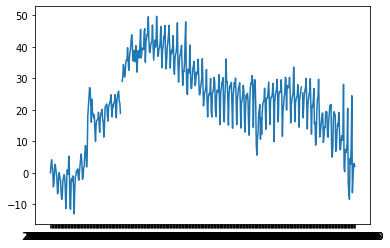

In [25]:
import matplotlib.pyplot as plt
difference = london.driving-london.transit
plt.plot(difference.index, difference)